# PRPS to PRPD

In [38]:
%%time
import os
import pandas as pd
import numpy as np



sub_folder_name = ""
CONVERTED_FOLDER_DIR = "./Cross Correlation Data/Cross Correlation_위상변환_PRPD/test/"
ORIGIN_FOLDER_DIR = "./Cross Correlation Data/Cross Correlation_위상변환_PRPS/test/"

labels = [label for label in os.listdir(ORIGIN_FOLDER_DIR)] # ['03. Noise (54)', '00. Void (204)', '02. Surface (144)', '01. Corona (81)']
# labels = [label.split(" ")[1] for label in root_labels] # ['Noise', 'Void', 'Surface', 'Corona']
print(labels)

# Create save folder
for label in labels:
    added_folder_name = CONVERTED_FOLDER_DIR+label #* ./data/05. 표준데이터(PRPD)/Void ... ./data/05. 표준데이터(PRPD)/Corona
    if not os.path.exists(added_folder_name):
        os.makedirs(added_folder_name)
        
# Preprocessing prps to prpd    
for label in (labels):
    print(label)
    file_list = os.listdir(ORIGIN_FOLDER_DIR + label)
    
    for i in range(len(file_list)):
        prps = pd.read_csv(ORIGIN_FOLDER_DIR + label + "/" + file_list[i], names=range(0,256))
        
        box = np.full((256,256), 0)
        for row, data_series in prps.iteritems():
            datas = data_series.value_counts()
            for col, data in datas.iteritems():
                box[row,col] = data


        data_df = pd.DataFrame(box, index = range(0, 256), columns=range(0, 256))
        data_df = data_df.T
        data_df = data_df.sort_index(ascending=False)
        
        data_df.to_csv(CONVERTED_FOLDER_DIR + label + "/" + file_list[i].split("[")[0] + "[PRPD변환].csv"  , index = False, header=False,  mode="w")

['Corona', 'Noise', 'Surface', 'Void']
Corona
Noise
Surface
Void
Wall time: 12.2 s


# PRPD to Image(.jpeg)

In [57]:
from tqdm import tqdm
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import PIL

In [83]:
images = []
files = []

class_labels = []
print("Loading {}".format(CONVERTED_FOLDER_DIR))

CONVERTED_FOLDER_DIR = "./Cross Correlation Data/Cross Correlation_위상변환_PRPD/train/"
  
for label in labels: # ['Noise', 'Void', 'Surface', 'Corona']
    for file in tqdm(os.listdir(os.path.join(CONVERTED_FOLDER_DIR, label))): 
        img_path = os.path.join(os.path.join(CONVERTED_FOLDER_DIR, label), file) 

        image = pd.read_csv(img_path, names=range(0, 256))
        image = np.pad(image, (2,2), 'constant', constant_values=0) # 256 -> 260
        image = np.reshape(image, (260, 260, 1))
        
        images.append(image)
        files.append((label, img_path))

Loading ./Cross Correlation Data/Cross Correlation_위상변환_PRPD/test/


100%|███████████████████████████████████████████████████████████████████████████████| 163/163 [00:01<00:00, 106.22it/s]


### 0 이외의 숫자 1로 정규화

In [84]:
images = np.array(images)

# 0 이외의 숫자 1로 정규화
images[images > 0] = 1
images = images.astype('float32')
images.shape

(385, 260, 260, 1)

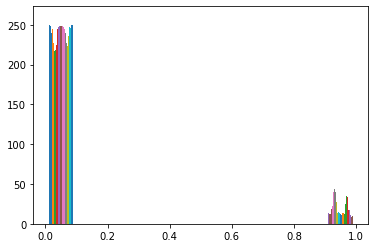

In [85]:
da = np.reshape(images[0], (260,260))
plt.hist(da)
plt.show()

In [86]:
images_3 = np.full((images.shape[0], 260, 260, 3), 0.0)

for i, s in enumerate(images):
    images_3[i] = cv2.cvtColor(s, cv2.COLOR_GRAY2RGB) 

('Corona', './Cross Correlation Data/Cross Correlation_위상변환_PRPD/train/Corona\\SMND_345kV_EBG_A_S_0A_62_20190515132500.dat[PRPD변환].csv')


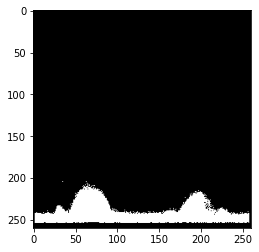

In [87]:
g = plt.imshow(images_3[0])
print(files[0])

In [88]:
# images_3 = images_3.astype('float32')
images_3.shape

(385, 260, 260, 3)

In [89]:
CONVERTED_JPEG_FOLDER_DIR = "./Cross Correlation Data/Cross Correlation_위상변환_PRPD_jpeg/train/"

# Create save folder
for label in labels:
    added_folder_name = CONVERTED_JPEG_FOLDER_DIR+label #* ./data/05. 표준데이터(PRPD)/Void ... ./data/05. 표준데이터(PRPD)/Corona
    if not os.path.exists(added_folder_name):
        os.makedirs(added_folder_name)
        
for image, file in zip(images_3, files):
    label, file_name = file
    file_name = file_name.split('\\')[-1].split("csv")[0]
    plt.imsave(CONVERTED_JPEG_FOLDER_DIR + label + "/"+file_name+"jpeg",image)